In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Logistic Function | 逻辑函数

$h_\theta(x) = g(\theta^Tx)$

$z = \theta^Tx$

$g(z) = \frac{1}{1+e^{-z}}$

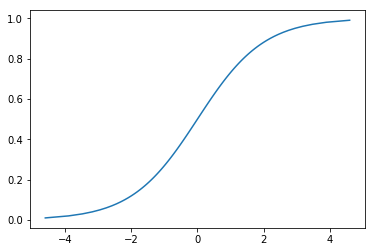

In [17]:
x = np.arange(0.01, 1, 0.01)
y = np.log(x/(1-x))
plt.plot(y, x)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Loss Function | 损失函数

$h = g(X\theta)$

$J(\theta) = \frac{1}{m} \cdot (-y^T\log(h)-(1-y)^T\log(1-h))$

In [5]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

Gradient Descent | 梯度下降

$\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m}X^T(g(X\theta)-y)$

In [6]:
def gradient(X, y, h):
    return np.dot(X.T, (h - y)) / y.shape[0]

In [23]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [13]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=True)

In [14]:
model.fit(X, y)

loss: 0.6106419114654529 	
loss: 0.034452845966779125 	
loss: 0.028827950481251582 	
loss: 0.025732610280109956 	
loss: 0.023408681770059416 	
loss: 0.021498579861162267 	
loss: 0.01987785226325257 	
loss: 0.018484240100021455 	
loss: 0.01727703882746986 	
loss: 0.016225243738973726 	
loss: 0.015303683492572683 	
loss: 0.014491540946675409 	
loss: 0.013771574805221582 	
loss: 0.013129544178512894 	
loss: 0.012553711220013393 	
loss: 0.012034402808820307 	
loss: 0.011563633144406931 	
loss: 0.011134787467491972 	
loss: 0.010742362507503583 	
loss: 0.010381756421228561 	
loss: 0.010049100144750613 	
loss: 0.009741122485536836 	
loss: 0.009455042259083566 	
loss: 0.009188481905555473 	
loss: 0.008939398093487191 	
loss: 0.008706025743869906 	
loss: 0.008486832669767219 	
loss: 0.008280482635587772 	
loss: 0.008085805119000323 	
loss: 0.007901770431605002 	


In [19]:
preds = model.predict(X, 0.5)

In [22]:
model.theta

array([-25.96818124,  12.56179068, -13.44549335])